# Web Scraping using Python

## In this tutorial, you'll learn how to extract data from the web, manipulate and clean data using Python's Pandas library, and data visualize using Python's Matplotlib library.

Web scraping is a term used to describe the use of a program or algorithm to extract and 
process large amounts of data from the web. Whether you are a data scientist, engineer, or 
anybody who analyzes large amounts of datasets, the ability to scrape data from the web is a useful skill to have.

Let's say you find data from the web, and there is no direct way to download it. Web scraping using Python is a skill you can use to extract the data into a useful form that can be imported.

In this tutorial, you will learn about the following:
 
     • Data extraction from the web using Python's Beautiful Soup module
     • Data manipulation and cleaning using Python's Pandas library
     • Data visualization using Python's Matplotlib library

 The dataset used in this tutorial was taken from a 10K race that took place in Hillsboro, OR on June 2017. 
 Specifically, you will analyze the performance of the 10K runners and answer questions such as:

 • What was the average finish time for the runners?
 • Did the runner's finish times follow a normal distribution?
 • Were there any performance differences between males and females of various age groups?

## Web Scraping using Beautiful Soup

 Using Jupyter Notebook,
 
 1. You should start by importing the necessary modules (pandas, numpy, matplotlib.pyplot and seaborn).
 
 **If you don't have Jupyter Notebook installed, 
 I recommend installing it using the Anaconda Python distribution which is available on the internet.
 To easily display the plots, make sure to include the line %matplotlib inline as shown below.

 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

To perform web scraping, you should also import the libraries shown below. The urllib.request module is used to open URLs. The Beautiful Soup package is used to extract data from html files. The Beautiful Soup library's name is bs4 which stands for Beautiful Soup, version 4.

In [2]:
from urllib.request import urlopen

from bs4 import BeautifulSoup

After importing necessary modules, you should specify the URL containing the dataset and pass it to urlopen() to get the html of the page

In [3]:
url = "http://www.hubertiming.com/results/2017GPTR10K"
html = urlopen(url)

Getting the html of the page is just the first step. Next step is to create a Beautiful Soup object from the html. This is done by passing the html to the BeautifulSoup() function. The Beautiful Soup package is used to parse the html, that is, take the raw html text and break it into Python objects. The second argument 'lxml' is the html parser whose details you do not need to worry about at this point.

In [4]:
soup = BeautifulSoup(html, 'lxml')
type(soup)

bs4.BeautifulSoup

The soup object allows you to extract interesting information about the website you're scraping such as getting the title of the page as shown below.

## Get the title first.

In [5]:
title = soup.title
print(title)

<title>2017 Intel Great Place to Run 10K \ Urban Clash Games Race Results</title>


You can also get the text of the webpage and quickly print it out to check if it is what you expect.

## Print out the text.

In [6]:
text = soup.get_text()
print(soup.text)








2017 Intel Great Place to Run 10K \ Urban Clash Games Race Results





        @media print {
            .noprint {
                display: none;
            }

            .dataTables_filter {
                display: none;
            }
        }

        #individualResults tbody tr {
            cursor: pointer;
        }

        .video-container {
            position: relative;
            padding-bottom: 56.25%; /* 16:9 */
            padding-top: 25px;
            height: 0;
        }

            .video-container iframe {
                position: absolute;
                top: 0;
                left: 0;
                width: 100%;
                height: 100%;
            }

        .dataTables_wrapper .dataTables_paginate {
            float: right;
            text-align: right;
            padding-top: 0.25em;
        }

            .dataTables_wrapper .dataTables_paginate .paginate_button {
                box-sizing: border-box;
                display: inlin

You can view the html of the webpage by right-clicking anywhere on the webpage and selecting "Inspect." This is what the result looks like.

https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531327753/Picture1_w0u783.png



## You can use the find_all() method of soup to extract useful html tags within a webpage.

## Examples of useful HTML tags include:

    < a >     for hyperlinks. 
    < table > for tables. 
    < tr >    for table rows. 
    < th >    for table headers.
    < td >    for table cells. 

## The code below shows how to extract all the hyperlinks within the webpage.

In [7]:
soup.find_all('a')

[<a href="mailto:timing@hubertiming.com">timing@hubertiming.com</a>,
 <a href="https://www.hubertiming.com/">Huber Timing Home</a>,
 <a class="btn btn-primary btn-lg" href="/results/2017GPTR" role="button" style="margin: 0px 0px 5px 5px">5K</a>,
 <a class="btn btn-primary btn-lg" href="/results/summary/2017GPTR10K" role="button" style="margin: 0px 0px 5px 5px">Summary</a>,
 <a class="btn btn-secondary btn-sm" href="#team" role="button"><i aria-hidden="true" class="fa fa-users"></i> Team Results</a>,
 <a class="btn btn-secondary btn-sm" href="#individual" role="button"><i aria-hidden="true" class="fa fa-user"></i> Individual Results</a>,
 <a name="team"></a>,
 <a id="individual" name="individual"></a>,
 <a href="#tabs-1" style="font-size: 18px">10K Results</a>,
 <a href="https://www.hubertiming.com/"><img height="65" src="/sites/all/themes/hubertiming/images/clockWithFinishSign_small.png" width="50"/>Huber Timing</a>,
 <a href="https://facebook.com/hubertiming/"><img src="/results/FB-f-

 ## Html tags sometimes come with attributes.
 
     As you can see from the output above, html tags sometimes come with attributes such as:

    - class
    - id
    - href
    - name
   
    etc...

     These attributes provide additional information about html elements.

## Extract and print out only hyperlinks.

    You can use a for loop and the get("href") method to extract and print out only hyperlinks.

In [8]:
all_links = soup.find_all("a")
for link in all_links:
    print(link.get("href"))

mailto:timing@hubertiming.com
https://www.hubertiming.com/
/results/2017GPTR
/results/summary/2017GPTR10K
#team
#individual
None
None
#tabs-1
https://www.hubertiming.com/
https://facebook.com/hubertiming/



## Print out table rows (tr) only.

    To print out table rows only, pass the 'tr' argument in soup.find_all().


## Print the first 10 rows for sanity check


In [9]:
rows = soup.find_all('tr')
print(rows[:10])

[<tr colspan="2"><b>10K:</b></tr>, <tr><td>Finishers:</td><td>577</td></tr>, <tr><td>Male:</td><td>414</td></tr>, <tr><td>Female:</td><td>163</td></tr>, <tr>
<td>Award</td>
<td>Name</td>
<td>Combined Time</td>
<td>1</td><td>2</td><td>3</td><td>4</td></tr>, <tr><td>1ST</td>
<td>DTNA2</td>
<td>02:54:41</td>
<td>00:40:36 - ANDY WEDAM</td><td>00:44:05 - VASILIOS TSIRIMIAGOS</td><td>00:44:48 - ANDRE RAUCH</td><td>00:45:10 - JONATHAN PARSONS</td></tr>, <tr><td>2ND</td>
<td>INTEL TEAM K</td>
<td>03:01:02</td>
<td>00:41:43 - WILLIAM BARRY</td><td>00:42:36 - EDDIE J FRIE</td><td>00:43:46 - SAMANTHA BAGLEY</td><td>00:52:55 - JOHN HAMILTON</td></tr>, <tr><td>3RD</td>
<td>INTEL TEAM F</td>
<td>03:06:06</td>
<td>00:36:42 - NATHAN A SUSTERSIC</td><td>00:39:21 - DEREK G OSBORNE</td><td>00:52:47 - CODY L COVEY</td><td>00:57:16 - VIRAJ P MODAK</td></tr>, <tr><td>4TH</td>
<td>DTNA1</td>
<td>03:15:33</td>
<td>00:40:28 - WITALI SPULING</td><td>00:46:45 - INGA ANDREYEVA</td><td>00:54:09 - KEATON WEISENBORN

## Take a table from a webpage and convert it into a dataframe.

The goal of this tutorial is to take a table from a webpage and convert it into a dataframe for easier manipulation using Python. 

    1. To get there, you should get all table rows in list form first.
    2. Convert that list into a dataframe. 

Below is a for loop that iterates through table rows and prints out the cells of the rows.

In [10]:
for row in rows:
    row_td = row.find_all('td')
print(row_td)
type(row_td)

[<td>577</td>, <td>443</td>, <td>LIBBY B MITCHELL</td>, <td>F</td>, <td>HILLSBORO</td>, <td>OR</td>, <td>1:41:18</td>, <td>16:20</td>, <td>163 of 163</td>, <td>F 36-45</td>, <td>56 of 56</td>, <td>0:52</td>, <td>1:42:10</td>, <td></td>]


bs4.element.ResultSet

## The easiest way to remove html tags.

The output above shows that each row is printed with html tags embedded in each row. 

       "This is not what you want!" 

You can use remove the html tags using Beautiful Soup or regular expressions.

    "The easiest way to remove html tags is to use Beautiful Soup, and it takes just one line of code!"

Pass the string of interest into BeautifulSoup() and use the get_text() method to extract the text without html tags.

## An example below using Beautifulsoup.

In [11]:
str_cells = str(row_td)
cleantext = BeautifulSoup(str_cells, "lxml").get_text()
print(cleantext)

[577, 443, LIBBY B MITCHELL, F, HILLSBORO, OR, 1:41:18, 16:20, 163 of 163, F 36-45, 56 of 56, 0:52, 1:42:10, ]


## Using regular expressions (re) is highly discouraged!

(You can use remove the html tags using Beautiful Soup or regular expressions. this is just an option and uses more lines of code than the previous example.)

since it requires several lines of code and one can easily make mistakes. It requires importing the re (for regular expressions) module. 


The code below shows how to build a regular expression that finds all the characters inside the < td > html tags and replace them with an empty string for each table row. 

First, you compile a regular expression by passing a string to match to re.compile(). The dot, star, and question mark (.*?) will match an opening angle bracket followed by anything and followed by a closing angle bracket.

It matches text in a non-greedy fashion, that is, it matches the shortest possible string. If you omit the question mark, it will match all the text between the first opening angle bracket and the last closing angle bracket. 

After compiling a regular expression, you can use the re.sub() method to find all the substrings where the regular expression matches and replace them with an empty string. 

The full code below; 

    1. Generates an empty list []. 

    2. Extracts text in between html tags for each row. 

    3. Appends it to the assigned list.

## An example below using regular expressions.

In [12]:
import re

list_rows = []
for row in rows:
    cells = row.find_all('td')
    str_cells = str(cells)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, '',str_cells))
    list_rows.append(clean2)
print(clean2)
type(clean2)

[577, 443, LIBBY B MITCHELL, F, HILLSBORO, OR, 1:41:18, 16:20, 163 of 163, F 36-45, 56 of 56, 0:52, 1:42:10, ]


str

## Convert the list into a dataframe.

The next step is to convert the list into a dataframe.

    (get a quick view of only the first 10 rows using Pandas!)

In [13]:
df = pd.DataFrame(list_rows)
df.head(20)

,0
0,[]
1,"[Finishers:, 577]"
2,"[Male:, 414]"
3,"[Female:, 163]"
4,"[Award, Name, Combined Time, 1, 2, 3, 4]"
5,"[1ST, DTNA2, 02:54:41, 00:40:36 - ANDY WEDAM, ..."
6,"[2ND, INTEL TEAM K, 03:01:02, 00:41:43 - WILLI..."
7,"[3RD, INTEL TEAM F, 03:06:06, 00:36:42 - NATHA..."
8,"[4TH, DTNA1, 03:15:33, 00:40:28 - WITALI SPULI..."
9,"[5TH, FXG1, 03:21:16, 00:42:56 - DAVID HERRON,..."


# Data Manipulation and Cleaning

       The dataframe is not in the format we want. To clean it up, you should split the "0" column into multiple columns at the comma position. This is accomplished by using the: 
    
    str.split() method.

In [14]:
df1 = df[0].str.split(',', expand=True)
df1.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,[],None,None,None,None,None,None,None,None,None,None,None,None,None
1,[Finishers:,577],None,None,None,None,None,None,None,None,None,None,None,None
2,[Male:,414],None,None,None,None,None,None,None,None,None,None,None,None
3,[Female:,163],None,None,None,None,None,None,None,None,None,None,None,None
4,[Award,Name,Combined Time,1,2,3,4],None,None,None,None,None,None,None
5,[1ST,DTNA2,02:54:41,00:40:36 - ANDY WEDAM,00:44:05 - VASILIOS TSIRIMIAGOS,00:44:48 - ANDRE RAUCH,00:45:10 - JONATHAN PARSONS],None,None,None,None,None,None,None
6,[2ND,INTEL TEAM K,03:01:02,00:41:43 - WILLIAM BARRY,00:42:36 - EDDIE J FRIE,00:43:46 - SAMANTHA BAGLEY,00:52:55 - JOHN HAMILTON],None,None,None,None,None,None,None
7,[3RD,INTEL TEAM F,03:06:06,00:36:42 - NATHAN A SUSTERSIC,00:39:21 - DEREK G OSBORNE,00:52:47 - CODY L COVEY,00:57:16 - VIRAJ P MODAK],None,None,None,None,None,None,None
8,[4TH,DTNA1,03:15:33,00:40:28 - WITALI SPULING,00:46:45 - INGA ANDREYEVA,00:54:09 - KEATON WEISENBORN,00:54:10 - MAISIE WEISENBORN],None,None,None,None,None,None,None
9,[5TH,FXG1,03:21:16,00:42:56 - DAVID HERRON,00:46:35 - LEO SOTO,00:53:59 - TONY GONZALEZ,00:57:45 - ARINDA SCHRUM],None,None,None,None,None,None,None


## Unwanted square brackets [ ] surrounding each row.

    This looks much better, but there is still work to do. The dataframe has unwanted square brackets surrounding each row. 

  ## You can use the strip() method to remove the opening ( [ )  square bracket on column "0."
  
  
  strip() method 

In [15]:
df1[0] = df1[0].str.strip('[')
df1.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,],None,None,None,None,None,None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None,None,None,None,None,None
4,Award,Name,Combined Time,1,2,3,4],None,None,None,None,None,None,None
5,1ST,DTNA2,02:54:41,00:40:36 - ANDY WEDAM,00:44:05 - VASILIOS TSIRIMIAGOS,00:44:48 - ANDRE RAUCH,00:45:10 - JONATHAN PARSONS],None,None,None,None,None,None,None
6,2ND,INTEL TEAM K,03:01:02,00:41:43 - WILLIAM BARRY,00:42:36 - EDDIE J FRIE,00:43:46 - SAMANTHA BAGLEY,00:52:55 - JOHN HAMILTON],None,None,None,None,None,None,None
7,3RD,INTEL TEAM F,03:06:06,00:36:42 - NATHAN A SUSTERSIC,00:39:21 - DEREK G OSBORNE,00:52:47 - CODY L COVEY,00:57:16 - VIRAJ P MODAK],None,None,None,None,None,None,None
8,4TH,DTNA1,03:15:33,00:40:28 - WITALI SPULING,00:46:45 - INGA ANDREYEVA,00:54:09 - KEATON WEISENBORN,00:54:10 - MAISIE WEISENBORN],None,None,None,None,None,None,None
9,5TH,FXG1,03:21:16,00:42:56 - DAVID HERRON,00:46:35 - LEO SOTO,00:53:59 - TONY GONZALEZ,00:57:45 - ARINDA SCHRUM],None,None,None,None,None,None,None


## Get the table headers. (th)

    The table is missing table headers. You can use the find_all() method to get the table headers.

find_all() method


In [16]:
col_labels = soup.find_all('th')

##  Extract text in between <> html tags .

    Similar to table rows, you can use Beautiful Soup to extract text in between html tags for table headers.

In [17]:
all_header = []
col_str = str(col_labels)
cleantext2 = BeautifulSoup(col_str, "lxml").get_text()
all_header.append(cleantext2)
print(all_header)

['[Place, Bib, Name, Gender, City, State, Chip Time, Chip Pace, Gender Place, Age Group, Age Group Place, Time to Start, Gun Time, Team]']


## Convert the list of headers into a pandas dataframe

    You can then convert the list of headers into a pandas dataframe.

In [18]:
df2 = pd.DataFrame(all_header)
df2.head()

,0
0,"[Place, Bib, Name, Gender, City, State, Chip T..."


## Split column "0" into multiple columns.

    Similarly, you can split column "0" into multiple columns at the comma position for all rows.


In [19]:
df3 = df2[0].str.split(',', expand=True)
df3.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]


## Dataframes can be concatenated into one.

    The two dataframes can be concatenated into one using the concat() method as illustrated below.

In [20]:
frames = [df3, df1]

df4 = pd.concat(frames)
df4.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]
0,],None,None,None,None,None,None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None,None,None,None,None,None
4,Award,Name,Combined Time,1,2,3,4],None,None,None,None,None,None,None
5,1ST,DTNA2,02:54:41,00:40:36 - ANDY WEDAM,00:44:05 - VASILIOS TSIRIMIAGOS,00:44:48 - ANDRE RAUCH,00:45:10 - JONATHAN PARSONS],None,None,None,None,None,None,None
6,2ND,INTEL TEAM K,03:01:02,00:41:43 - WILLIAM BARRY,00:42:36 - EDDIE J FRIE,00:43:46 - SAMANTHA BAGLEY,00:52:55 - JOHN HAMILTON],None,None,None,None,None,None,None
7,3RD,INTEL TEAM F,03:06:06,00:36:42 - NATHAN A SUSTERSIC,00:39:21 - DEREK G OSBORNE,00:52:47 - CODY L COVEY,00:57:16 - VIRAJ P MODAK],None,None,None,None,None,None,None
8,4TH,DTNA1,03:15:33,00:40:28 - WITALI SPULING,00:46:45 - INGA ANDREYEVA,00:54:09 - KEATON WEISENBORN,00:54:10 - MAISIE WEISENBORN],None,None,None,None,None,None,None


## Assign the first row to be the table header.

    Below shows how to assign the first row to be the table header.

In [21]:
df5 = df4.rename(columns=df4.iloc[0])
df5.head()

,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]
0,],None,None,None,None,None,None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None,None,None,None,None,None


## The table is almost properly formatted...

    At this point, the table is almost properly formatted. For analysis, you can start by getting an overview 
    of the data as shown below.

In [22]:
df5.info()
df5.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 598 entries, 0 to 596
Data columns (total 14 columns):
[Place              598 non-null object
 Bib                596 non-null object
 Name               593 non-null object
 Gender             593 non-null object
 City               593 non-null object
 State              593 non-null object
 Chip Time          593 non-null object
 Chip Pace          578 non-null object
 Gender Place       578 non-null object
 Age Group          578 non-null object
 Age Group Place    578 non-null object
 Time to Start      578 non-null object
 Gun Time           578 non-null object
 Team]              578 non-null object
dtypes: object(14)
memory usage: 70.1+ KB


(598, 14)

## Drop all rows with any missing values.

    The table has 597 rows and 14 columns. You can drop all rows with any missing values.

dropna(axis=0, how='any')

In [23]:
df6 = df5.dropna(axis=0, how='any')

##  Table header is replicated!

    Also, notice how the table header is replicated as the first row in df5. It can be dropped using the following line of code.

In [24]:
df7 = df6.drop(df6.index[0])
df7.head()

,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]
20,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,1 of 414,M 36-45,1 of 152,0:03,36:24,]
21,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,2 of 414,M 26-35,1 of 154,0:03,36:45,\r\n ...
22,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,3 of 414,M 46-55,1 of 64,0:04,37:48,]
23,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,4 of 414,M 36-45,2 of 152,0:03,38:37,]
24,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,6:20,5 of 414,M 26-35,2 of 154,0:03,39:24,\r\n ...


## Renaming the '[Place' and ' Team]' columns.

    You can perform more data cleaning by renaming the '[Place' and ' Team]' columns. Python is very picky about space. 

### Make sure you include space after the quotation mark (:) in ' Team]'.

In [25]:
df7.rename(columns={'[Place': 'Place'},inplace=True)
df7.rename(columns={' Team]': 'Team'},inplace=True)
df7.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team
20,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,1 of 414,M 36-45,1 of 152,0:03,36:24,]
21,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,2 of 414,M 26-35,1 of 154,0:03,36:45,\r\n ...
22,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,3 of 414,M 46-55,1 of 64,0:04,37:48,]
23,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,4 of 414,M 36-45,2 of 152,0:03,38:37,]
24,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,6:20,5 of 414,M 26-35,2 of 154,0:03,39:24,\r\n ...


## Final data cleaning step!

    The final data cleaning step involves removing the closing bracket for cells in the "Team" column.

In [26]:
df7['Team'] = df7['Team'].str.strip(']')
df7

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team
20,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,1 of 414,M 36-45,1 of 152,0:03,36:24,
21,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,2 of 414,M 26-35,1 of 154,0:03,36:45,\r\n ...
22,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,3 of 414,M 46-55,1 of 64,0:04,37:48,
23,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,4 of 414,M 36-45,2 of 152,0:03,38:37,
24,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,6:20,5 of 414,M 26-35,2 of 154,0:03,39:24,\r\n ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,573,273,RACHEL L VANEY,F,OTHER,OR,1:38:17,15:51,160 of 163,F 18-25,21 of 21,0:17,1:38:34,
593,574,467,ROHIT B DSOUZA,M,PORTLAND,OR,1:38:31,15:53,414 of 414,M 36-45,152 of 152,2:01,1:40:32,\r\n ...
594,575,471,CENITA D'SOUZA,F,PORTLAND,OR,1:38:32,15:53,161 of 163,F 46-55,22 of 22,2:02,1:40:34,
595,576,338,PRANAVI APPANA,F,HILLSBORO,OR,1:40:47,16:15,162 of 163,F 26-35,59 of 59,1:14,1:42:01,


In [27]:
print(577-306)


271


In [28]:
df8 = df7.head(306)
df9 = df7.tail(271)
df8
df9

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team
326,307,716,PRASANNA A GOWDA,M,PORTLAND,OR,1:00:01,9:40,255 of 414,M 36-45,93 of 152,1:06,1:01:07,
327,308,269,STANSLAUS W MWAKALEBELA,M,PORTLAND,OR,1:00:03,9:41,256 of 414,M 36-45,94 of 152,1:14,1:01:17,
328,309,640,ANIL KAZA,M,HILLSBORO,OR,1:00:12,9:42,257 of 414,M 36-45,95 of 152,0:29,1:00:41,
329,310,561,MARIA PATLA,F,FOREST GROVE,OR,1:00:12,9:42,53 of 163,F 36-45,18 of 56,0:37,1:00:49,
330,311,747,LAWRENCE HEYWOOD,M,PORTLAND,OR,1:00:13,9:42,258 of 414,M 46-55,50 of 64,0:55,1:01:08,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,573,273,RACHEL L VANEY,F,OTHER,OR,1:38:17,15:51,160 of 163,F 18-25,21 of 21,0:17,1:38:34,
593,574,467,ROHIT B DSOUZA,M,PORTLAND,OR,1:38:31,15:53,414 of 414,M 36-45,152 of 152,2:01,1:40:32,\r\n ...
594,575,471,CENITA D'SOUZA,F,PORTLAND,OR,1:38:32,15:53,161 of 163,F 46-55,22 of 22,2:02,1:40:34,
595,576,338,PRANAVI APPANA,F,HILLSBORO,OR,1:40:47,16:15,162 of 163,F 26-35,59 of 59,1:14,1:42:01,


## The dataframe is in the desired format!

        It took a while to get here, but at this point, the dataframe is in the desired format. Now you can move onto the exciting part and start plotting the data and computing interesting statistics.


# Data Analysis and Visualization

    The first question to answer is, 
    
   ## 1. what was the average finish time (in minutes) for the runners? 
   
   You need to:
   
   2. convert the column "Chip Time" into just minutes. 
   
   One way to do this is to convert the column to a list first for manipulation.
   
   time_list = df7[' Chip Time'].tolist()



# You can use a for loop to convert 'Chip Time' to minutes



In [29]:
time_list8 = df8[' Chip Time'].tolist()
time_list9 = df9[' Chip Time'].tolist()
time_mins = []
timetail =[]


for i in time_list8:
    
    m, s  = i.split(':')
    
    math =  int(m) * 60 + int(s)/ 60 
            
    time_mins.append(math)


for i in time_list9:
    h, m, s = i.split(':')
    math = int(h) * 3600 + int(m) *60 + int(s)/60
    timetail.append(math)
    
time_mins.extend(timetail)
print(time_mins)

[2160.35, 2160.7, 2220.733333333333, 2280.5666666666666, 2340.35, 2340.8166666666666, 2400.0666666666666, 2400.0833333333335, 2400.2833333333333, 2400.35, 2400.4666666666667, 2400.6, 2400.7166666666667, 2460.016666666667, 2460.3166666666666, 2460.7166666666667, 2460.983333333333, 2520.383333333333, 2520.483333333333, 2520.5833333333335, 2520.6, 2520.616666666667, 2520.9333333333334, 2580.4333333333334, 2580.45, 2580.6666666666665, 2580.7, 2580.7166666666667, 2580.766666666667, 2580.766666666667, 2580.7833333333333, 2580.7833333333333, 2640.0666666666666, 2640.0833333333335, 2640.1, 2640.116666666667, 2640.383333333333, 2640.633333333333, 2640.6833333333334, 2640.7, 2640.8, 2700.05, 2700.0833333333335, 2700.1666666666665, 2700.1833333333334, 2700.1833333333334, 2700.2166666666667, 2700.233333333333, 2700.25, 2700.2833333333333, 2700.45, 2700.4666666666667, 2700.483333333333, 2700.6, 2700.6, 2700.6666666666665, 2700.6666666666665, 2700.8166666666666, 2700.9166666666665, 2760.033333333333

## Convert the list back into a dataframe.

    The next step is to 

    1. convert the list back into a dataframe and, 

    2. make a new column ("Runner_mins") for runner chip times expressed in just minutes.

In [30]:
df7['Runner_mins'] = time_mins
df7.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team,Runner_mins
20,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,1 of 414,M 36-45,1 of 152,0:03,36:24,,2160.350000
21,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,2 of 414,M 26-35,1 of 154,0:03,36:45,\r\n ...,2160.700000
22,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,3 of 414,M 46-55,1 of 64,0:04,37:48,,2220.733333
23,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,4 of 414,M 36-45,2 of 152,0:03,38:37,,2280.566667
24,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,6:20,5 of 414,M 26-35,2 of 154,0:03,39:24,\r\n ...,2340.350000


## How to calculate statistics? 

    The code below shows how to calculate statistics for numeric columns only in the dataframe.


In [31]:
df7.describe(include=[np.number])

,Runner_mins
count,577.000000
mean,3573.041132
std,719.400340
min,2160.350000
25%,3060.000000
50%,3540.016667
75%,4020.266667
max,6060.300000


    Interestingly, the average chip time for all runners was ~60 mins. The fastest 10K runner finished in 36.35 mins, and the slowest runner finished in 101.30 minutes.

##  Boxplot  summary statistics.

    A boxplot is another useful tool to visualize summary statistics (maximum, minimum, medium, first quartile, third quartile, including outliers). Below are data summary statistics for the runners shown in a boxplot. For data visualization, it is convenient to first import parameters from the pylab module that comes with matplotlib and set the same size for all figures to avoid doing it for each figure.

In [32]:
from pylab import rcParams

rcParams['figure.figsize'] = 15, 5

([<matplotlib.axis.XTick at 0x1a24d794d0>],
 <a list of 1 Text xticklabel objects>)

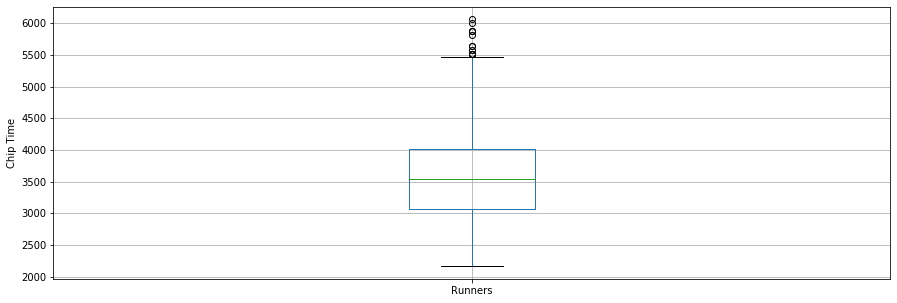

In [33]:
df7.boxplot(column='Runner_mins')

plt.grid(True, axis='y')

plt.ylabel('Chip Time')

plt.xticks([1], ['Runners'])

##  Normal distribution?

    The second question to answer is: Did the runners' finish times follow a normal distribution?
    
    Below is a distribution plot of runners' chip times plotted using the seaborn library. The distribution looks almost normal.


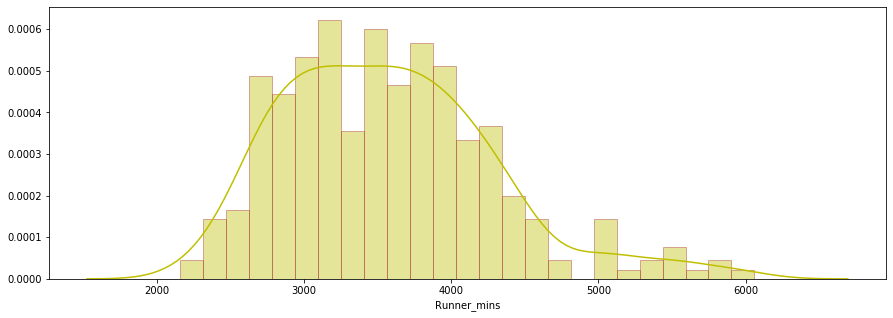

In [43]:
x = df7['Runner_mins']
ax = sns.distplot(x, hist=True, kde=True, rug=False, color='y', bins=25, hist_kws={'edgecolor':'brown'})
plt.show()

##  Performance differences ?

    The third question deals with whether there were any performance differences between males and females of various age groups?
    
    Below is a distribution plot of chip times for males and females.


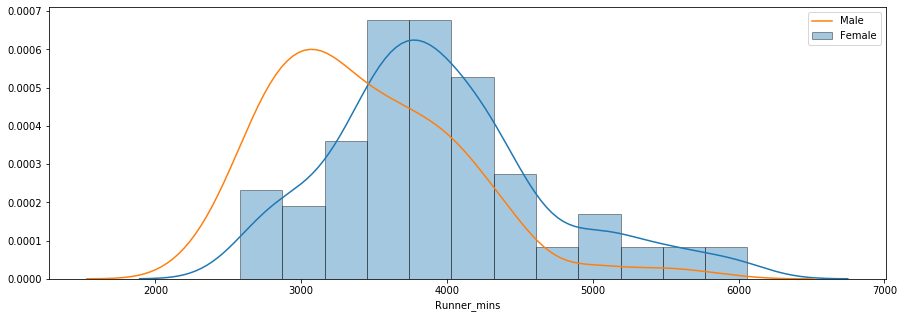

In [35]:
f_fuko = df7.loc[df7[' Gender']==' F']['Runner_mins']

m_fuko = df7.loc[df7[' Gender']==' M']['Runner_mins']

sns.distplot(f_fuko, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Female')

sns.distplot(m_fuko, hist=False, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Male')
plt.legend()

    The distribution indicates that females were slower than males on average. 
    
## groupby() method

    You can use the groupby() method to compute summary statistics for males and females separately as shown below.

    

In [36]:
g_stats = df7.groupby(" Gender", as_index=True).describe()

print(g_stats)

        Runner_mins                                                     \
              count         mean         std          min          25%   
 Gender                                                                  
 F            163.0  3936.591616  734.112304  2580.766667  3480.758333   
 M            414.0  3429.904106  661.589519  2160.350000  2940.395833   

                                                
                 50%          75%          max  
 Gender                                         
 F       3840.616667  4290.558333  6060.300000  
 M       3300.791667  3840.804167  5880.516667  


## Average chip time for all females and males.

    The average chip time for all females and males was ~66 mins and ~58 mins, respectively. 
    
    
## side-by-side boxplot

    Below is a side-by-side boxplot comparison of male and female finish times.


Text(0.5, 0.98, '')

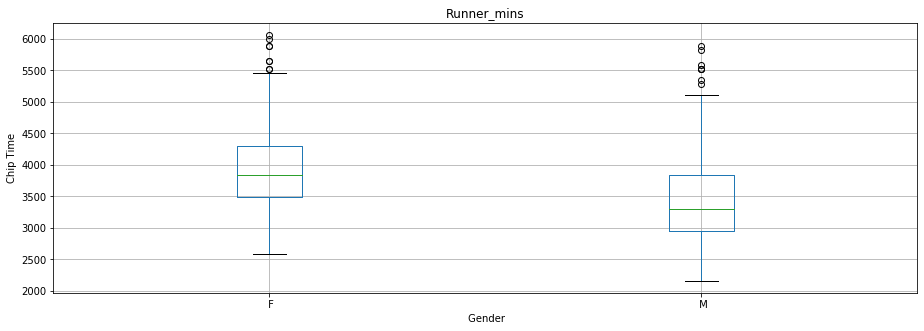

In [37]:
df7.boxplot(column='Runner_mins', by=' Gender')
plt.ylabel('Chip Time')
plt.suptitle("")

# Conclusion

     In this tutorial, you performed web scraping using Python. You used the Beautiful Soup library to parse html data and convert it into a form that can be used for analysis. You performed cleaning of the data in Python and created useful plots (box plots, bar plots, and distribution plots) to reveal interesting trends using Python's matplotlib and seaborn libraries. After this tutorial, you should be able to use Python to easily scrape data from the web, apply cleaning techniques and extract useful insights from the data.

     If you would like to learn more about Python, take DataCamp's free Intro to Python for Data Science course.